In [2]:
import requests
import json
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from folium.plugins import MarkerCluster
from folium import IFrame

In [3]:
"""
api_url = "https://healthdata.gov/resource/879u-23sm.json"

limit = 1000

offset = 0

all_data = []

while True:
    params = {"$limit":limit, "$offset":offset }
    response = requests.get(api_url)
    data = response.json()
    
    if not data:
        break
    
    all_data.extend(data)
    
    offset += limit
df = pd.DataFrame(data)

df.to_csv("api_data.csv", index=False)
"""


'\napi_url = "https://healthdata.gov/resource/879u-23sm.json"\n\nlimit = 1000\n\noffset = 0\n\nall_data = []\n\nwhile True:\n    params = {"$limit":limit, "$offset":offset }\n    response = requests.get(api_url)\n    data = response.json()\n    \n    if not data:\n        break\n    \n    all_data.extend(data)\n    \n    offset += limit\ndf = pd.DataFrame(data)\n\ndf.to_csv("api_data.csv", index=False)\n'

In [10]:
df = pd.read_csv("./Clinical data analysis/data/raw_data/clinical_data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './Clinical data analysis/data/raw_data/clinical_data.csv'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65468 entries, 0 to 65467
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Provider Name                   65468 non-null  object 
 1   Address 1                       65467 non-null  object 
 2   Address 2                       7331 non-null   object 
 3   City                            65467 non-null  object 
 4   State                           65467 non-null  object 
 5   Zip                             65467 non-null  object 
 6   Public Phone                    17843 non-null  object 
 7   Latitude                        65468 non-null  float64
 8   Longitude                       65468 non-null  float64
 9   Geopoint                        65468 non-null  object 
 10  Last Report Date                65467 non-null  object 
 11  Is PAP Site                     65468 non-null  bool   
 12  Prescribing Services Available  

In [31]:
state_code_to_name = {
    'FL': 'Florida', 'AL': 'Alabama', 'CA': 'California', 'PA': 'Pennsylvania', 
    'HI': 'Hawaii', 'GA': 'Georgia', 'ID': 'Idaho', 'IL': 'Illinois', 
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 
    'LA': 'Louisiana', 'ME': 'Maine', 'AK': 'Alaska', 'UT': 'Utah', 
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 
    'NC': 'North Carolina', 'WV': 'West Virginia', 'PR': 'Puerto Rico', 
    'NJ': 'New Jersey', 'VA': 'Virginia', 'RI': 'Rhode Island', 'VT': 'Vermont', 
    'MO': 'Missouri', 'TX': 'Texas', 'SC': 'South Carolina', 'NY': 'New York', 
    'CO': 'Colorado', 'OK': 'Oklahoma', 'TN': 'Tennessee', 'CT': 'Connecticut', 
    'NH': 'New Hampshire', 'AZ': 'Arizona', 'WI': 'Wisconsin', 'WA': 'Washington', 
    'DE': 'Delaware', 'MS': 'Mississippi', 'OR': 'Oregon', 'OH': 'Ohio', 
    'NE': 'Nebraska', 'VI': 'Virgin Islands', 'NV': 'Nevada', 'NM': 'New Mexico', 
    'AR': 'Arkansas', 'DC': 'District of Columbia', 'MT': 'Montana', 'SD': 'South Dakota', 
    'ND': 'North Dakota', 'WY': 'Wyoming', 'GU': 'Guam', 'MP': 'Northern Mariana Islands'
}

df['State'] = df['State'].map(state_code_to_name).fillna(df['State'])

In [32]:
df['State'].unique()

array(['Florida', 'Alabama', 'California', 'Pennsylvania', 'Hawaii',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Alaska', 'Utah', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'North Carolina',
       'West Virginia', 'Puerto Rico', 'New Jersey', 'Virginia',
       'Rhode Island', 'Vermont', 'Missouri', 'Texas', 'South Carolina',
       'New York', 'Colorado', 'Oklahoma', 'Tennessee', 'Connecticut',
       'New Hampshire', 'Arizona', 'Wisconsin', 'Washington', 'Delaware',
       'Mississippi', 'Oregon', 'Ohio', 'Nebraska', 'Virgin Islands',
       'Nevada', 'New Mexico', 'Arkansas', 'District of Columbia',
       'Montana', 'South Dakota', 'North Dakota', 'Wyoming', 'Guam', nan,
       'Northern Mariana Islands'], dtype=object)

In [33]:
total_sites = len(df)
icatt_sites = df[df["Is ICATT Site"] == True].shape[0]
home_delivery_sites = df[df['Home Delivery'] == True].shape[0]
prescribing_sites = df[df["Prescribing Services Available"] == True].shape[0]
print(f"Total_sites : {total_sites}\nICATT sites: {icatt_sites}\nHome Delivery Sites: {home_delivery_sites}\nPrescribing Services Available: {prescribing_sites}")


Total_sites : 65468
ICATT sites: 26
Home Delivery Sites: 325
Prescribing Services Available: 534


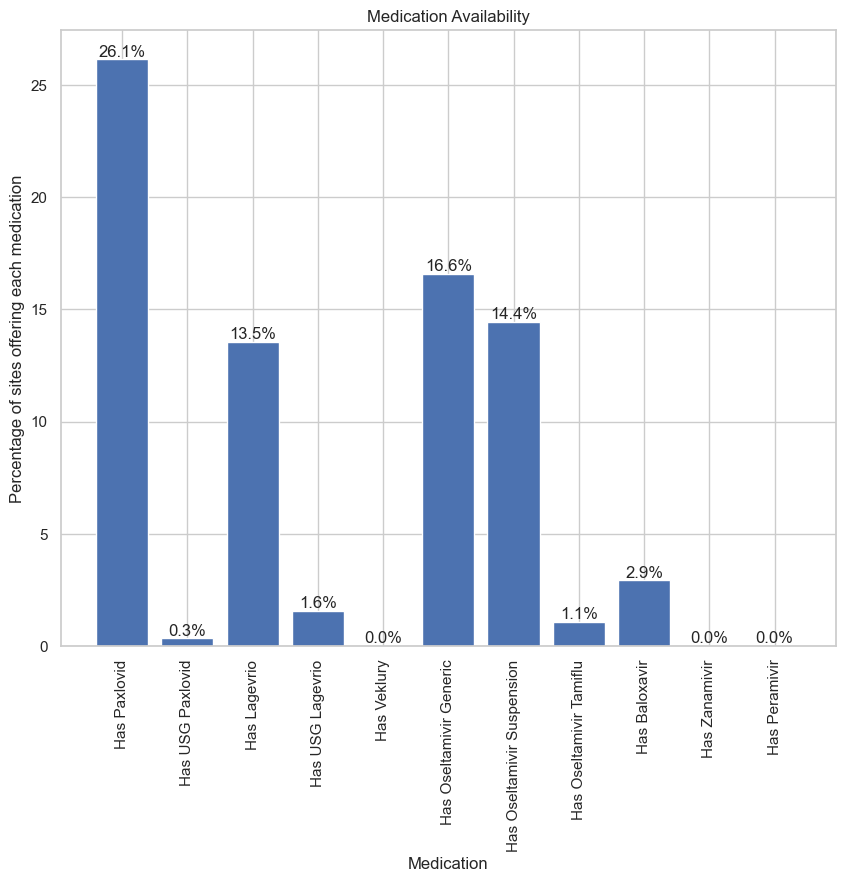

In [34]:
medication_column = ['Has Paxlovid', 'Has USG Paxlovid', 'Has Lagevrio', 
                  'Has USG Lagevrio', 'Has Veklury', 'Has Oseltamivir Generic',
                  'Has Oseltamivir Suspension', 'Has Oseltamivir Tamiflu',
                  'Has Baloxavir', 'Has Zanamivir', 'Has Peramivir']
medication_availability = df[medication_column].mean() * 100


plt.figure(figsize=(10,8))
bars = plt.bar(medication_availability.index, medication_availability.values)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height, 
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )
plt.title("Medication Availability")
plt.xlabel("Medication")
plt.ylabel("Percentage of sites offering each medication")
plt.xticks(rotation=90)

plt.savefig("medication_availability.png", bbox_inches='tight')
plt.show()

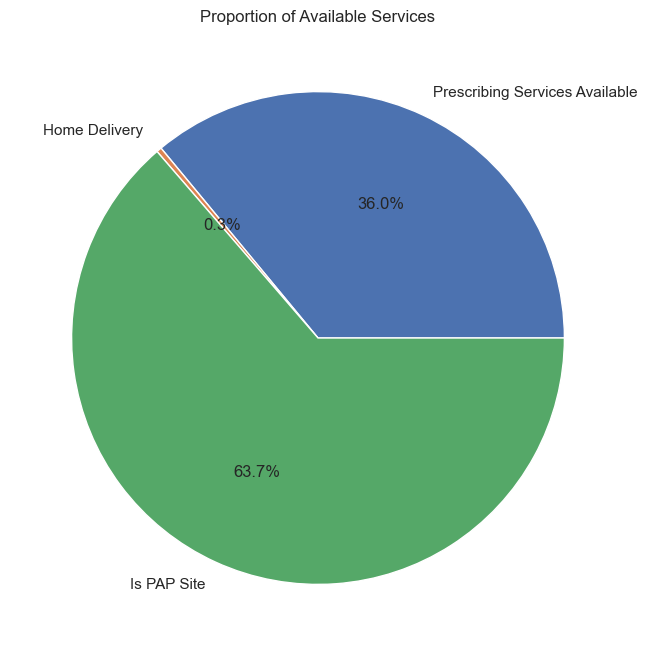

In [35]:
service_columns = ['Prescribing Services Available', 'Home Delivery', 'Is PAP Site']
service_availability = df[service_columns].mean() * 100

plt.figure(figsize=(8,8))
plt.pie(service_availability, labels=service_availability.index, autopct='%1.1f%%')
plt.title('Proportion of Available Services')

plt.savefig("service_availability.png", bbox_inches='tight')
plt.show()

In [55]:
df['Last Report Date'].unique()

<DatetimeArray>
['2025-01-10 00:00:00', '2025-01-13 19:45:42', '2025-01-13 19:47:00',
 '2025-01-13 19:47:35', '2024-12-19 22:39:33', '2024-11-25 21:52:09',
 '2025-01-06 18:03:40', '2025-01-06 18:01:38', '2025-01-06 18:04:05',
 '2025-01-06 18:03:44',
 ...
 '2024-12-26 19:44:07', '2025-01-02 23:24:09', '2025-01-13 23:17:53',
 '2024-12-23 18:01:01', '2024-12-23 18:00:35', '2024-12-23 18:00:03',
 '2025-01-10 13:11:29', '2025-01-10 13:17:05', '2025-01-06 18:05:32',
 '2024-12-20 19:15:48']
Length: 736, dtype: datetime64[ns]

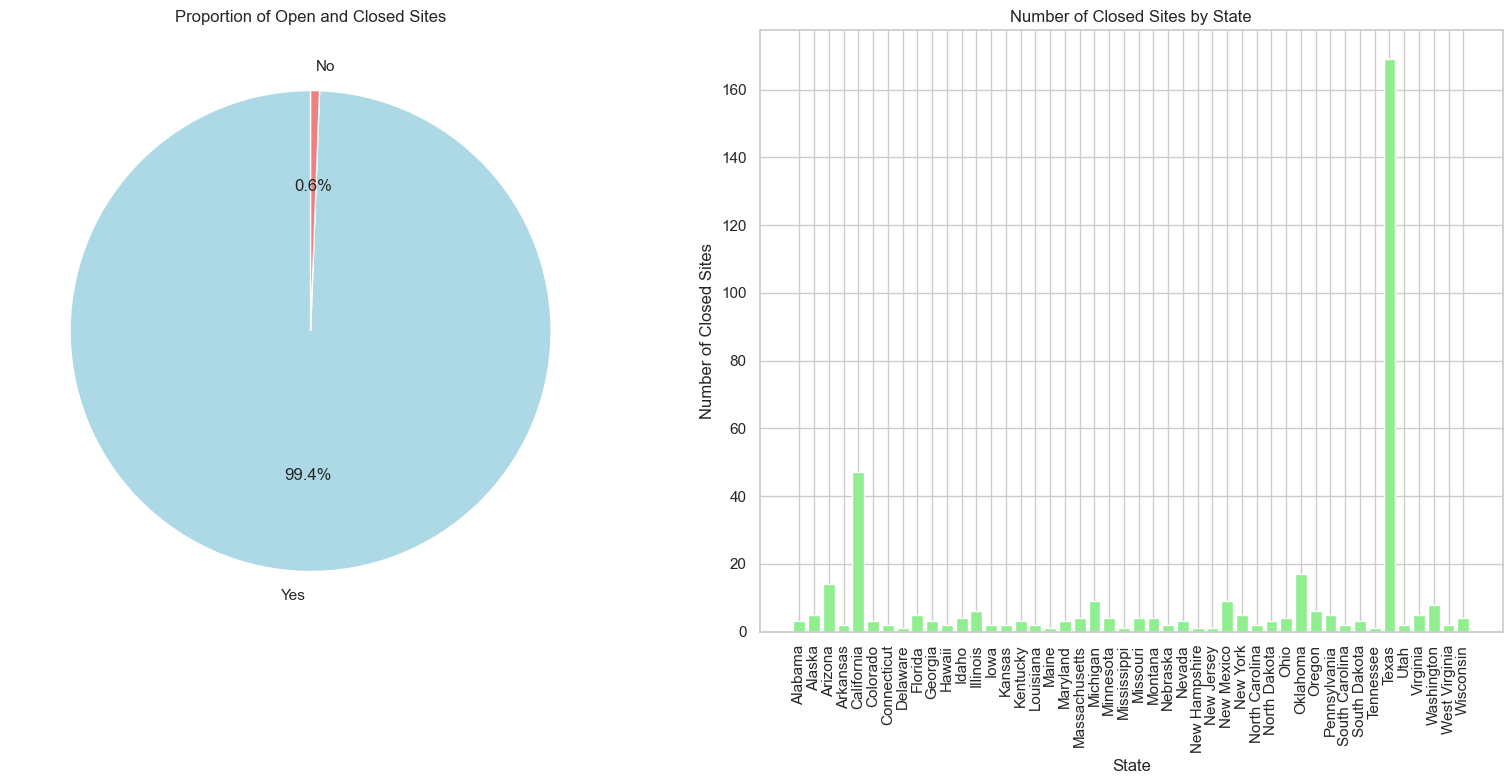

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been properly loaded

# Convert 'Last Report Date' to datetime
df['Last Report Date'] = pd.to_datetime(df['Last Report Date'], errors='coerce')

# Extract the year from 'Last Report Date'
df['year'] = df['Last Report Date'].dt.year

# Create 'still_open' column based on the year
df['still_open'] = df['year'].apply(lambda x: 'Yes' if x > 2024 else 'No')

# Get the proportion of open and closed sites
open_count = df['still_open'].value_counts(normalize=True) * 100

# Filter closed sites
df_closedsites = df[df['still_open'] == 'No']

# Group by 'State' and count occurrences of closed sites in each state
df_closedsites_count = df_closedsites.groupby('State').size().reset_index(name='closed_sites_count')

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for open/closed site proportions
ax[0].pie(open_count, labels=open_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax[0].set_title("Proportion of Open and Closed Sites")

# Plot the bar chart for closed sites by state
ax[1].bar(df_closedsites_count['State'], df_closedsites_count['closed_sites_count'], color='lightgreen')
ax[1].set_title("Number of Closed Sites by State")
ax[1].set_xlabel("State")
ax[1].set_ylabel("Number of Closed Sites")
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()  # To adjust space between subplots
plt.show()


In [66]:
df_closedsites_count

,State,closed_sites_count
0,Alabama,3
1,Alaska,5
2,Arizona,14
3,Arkansas,2
4,California,47
5,Colorado,3
6,Connecticut,2
7,Delaware,1
8,Florida,5
9,Georgia,3


C:\Users\PC\AppData\Local\Temp\ipykernel_10988\1560324205.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Report Date'] = pd.to_datetime(df['Last Report Date'], errors='coerce')


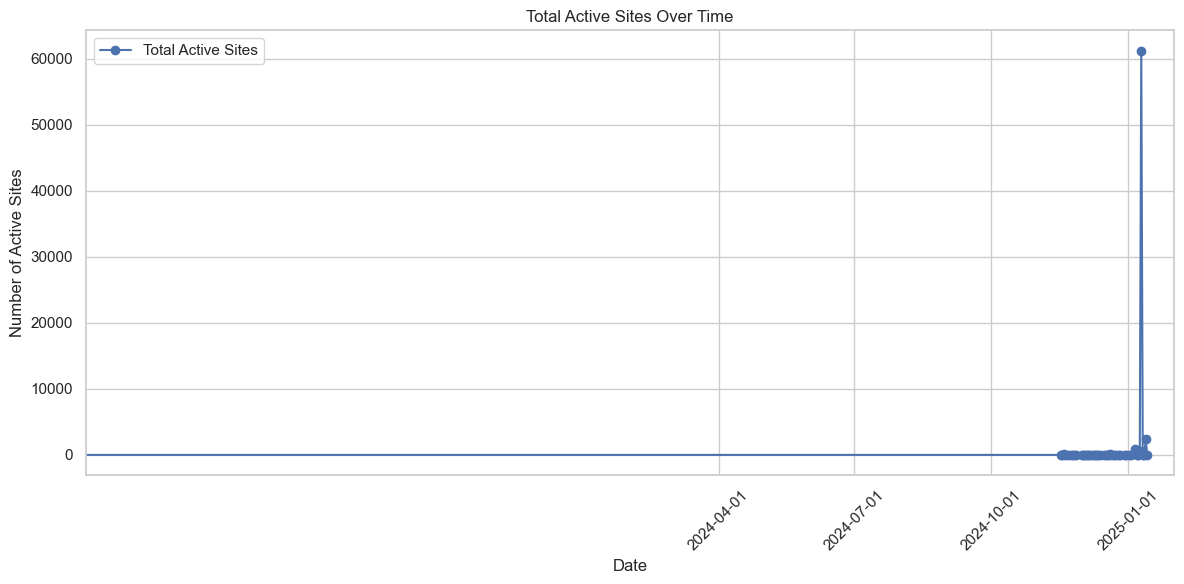

In [36]:
df['Last Report Date'] = pd.to_datetime(df['Last Report Date'], errors='coerce')

active_sites = df.groupby(df['Last Report Date'].dt.date).size()
#start_date=pd.to_datetime('')

#date_range = pd.date_range(start=active_sites.index.min(), end=active_sites.index.max(), freq= '12MS')

#custom_dates = ['2024-02-01', '2024-05-01', '2024-08-01', '2024-12-01', '2025-02-01']
#custom_dates = pd.to_datetime(custom_dates)

start_date = pd.to_datetime('2024-04-01')
end_date = pd.to_datetime('2025-01-01')

xticks = pd.date_range(start=start_date, end=end_date, freq='3MS')

plt.figure(figsize=(12,6))
plt.plot(active_sites.index, active_sites.values, marker='o', color='b', label='Total Active Sites')
plt.xlim(pd.to_datetime('2023-02-01'), pd.to_datetime('2025-02-01'))
plt.title("Total Active Sites Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Active Sites')
plt.xticks(xticks, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#print(df['Last Report Date'].max())


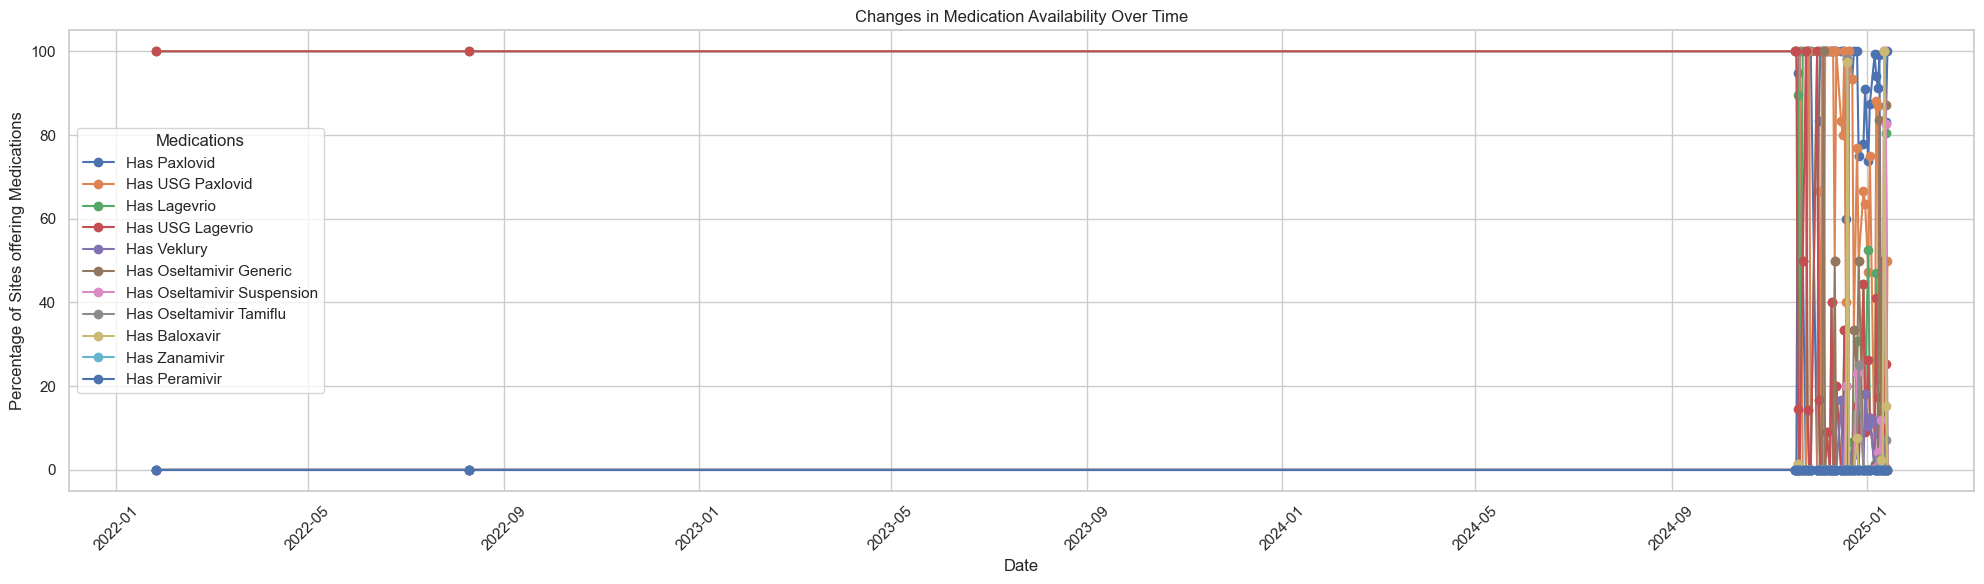

In [37]:
medications = ['Has Paxlovid', 'Has USG Paxlovid', 'Has Lagevrio', 'Has USG Lagevrio', 
               'Has Veklury', 'Has Oseltamivir Generic', 'Has Oseltamivir Suspension', 
               'Has Oseltamivir Tamiflu', 'Has Baloxavir', 'Has Zanamivir', 'Has Peramivir']

medication_changes = pd.DataFrame(columns=medications)

for medication in medications:
    medication_changes[medication] = df.groupby(df['Last Report Date'].dt.date)[medication].mean() * 100

plt.figure(figsize=(20,6))
for medication in medications:
    plt.plot(medication_changes.index, medication_changes[medication], marker="o", label=medication)
    
plt.title("Changes in Medication Availability Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage of Sites offering Medications")
plt.xticks(rotation=45)
#plt.ax
plt.legend(title="Medications")
plt.tight_layout()
plt.savefig("medication_availability_over_time.png", bbox_inches='tight')
plt.show()


In [38]:
df['flu_covid_status'] = df.apply(lambda row: "Flu & covid" if row['Is Flu'] and row['Is COVID-19'] else ('Flu only' if row['Is Flu'] else ('Covid_only' if row['Is COVID-19'] else 'Neither' )),
                              axis=1)

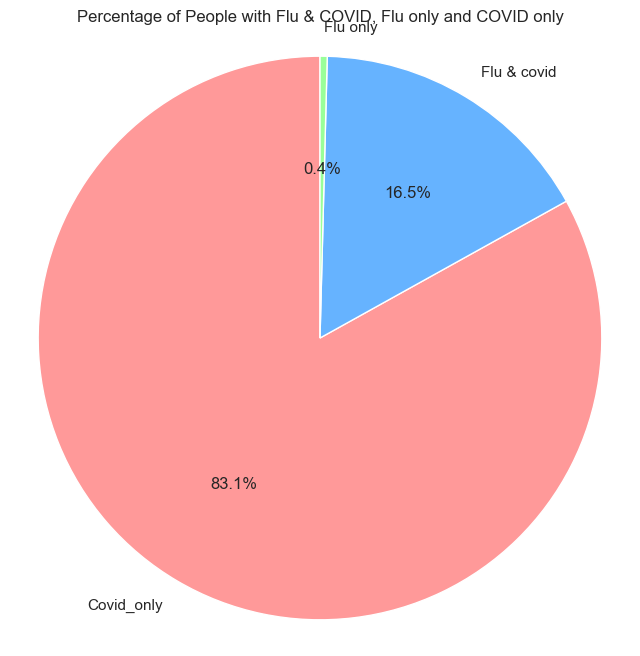

In [39]:
status_counts = df['flu_covid_status'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Percentage of People with Flu & COVID, Flu only and COVID only")
plt.axis("equal")
plt.show()

In [40]:
import folium
from folium.plugins import HeatMap

average_lat = df['Latitude'].mean()
average_lon = df['Longitude'].mean()

m = folium.Map(location=[average_lat, average_lon], zoom_start=6)

heat_data = [[lat, lon] for lat, lon in zip(df['Latitude'], df['Longitude'])]

HeatMap(heat_data).add_to(m)

m.save('heatmap.html')

In [41]:
from PIL import Image

img_path = "C:/Users/PC/Desktop/Bala/Virtual_internship/Clinical data analysis/distribution of treatment loaction across regions.PNG"

img = Image.open(img_path)
img.show()


The treatment location is distributed throught US states. 

In [42]:
#Regiion based analysis
state_count = df['State'].value_counts()
state_count.head(10)

State
California        6182
Texas             5252
New York          4995
Florida           4702
Pennsylvania      2825
Georgia           2246
Michigan          2224
New Jersey        2187
Ohio              2135
North Carolina    2113
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_10988\4035363739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data= state_data, x='Number of Treatment Sites', y='State', palette="viridis")


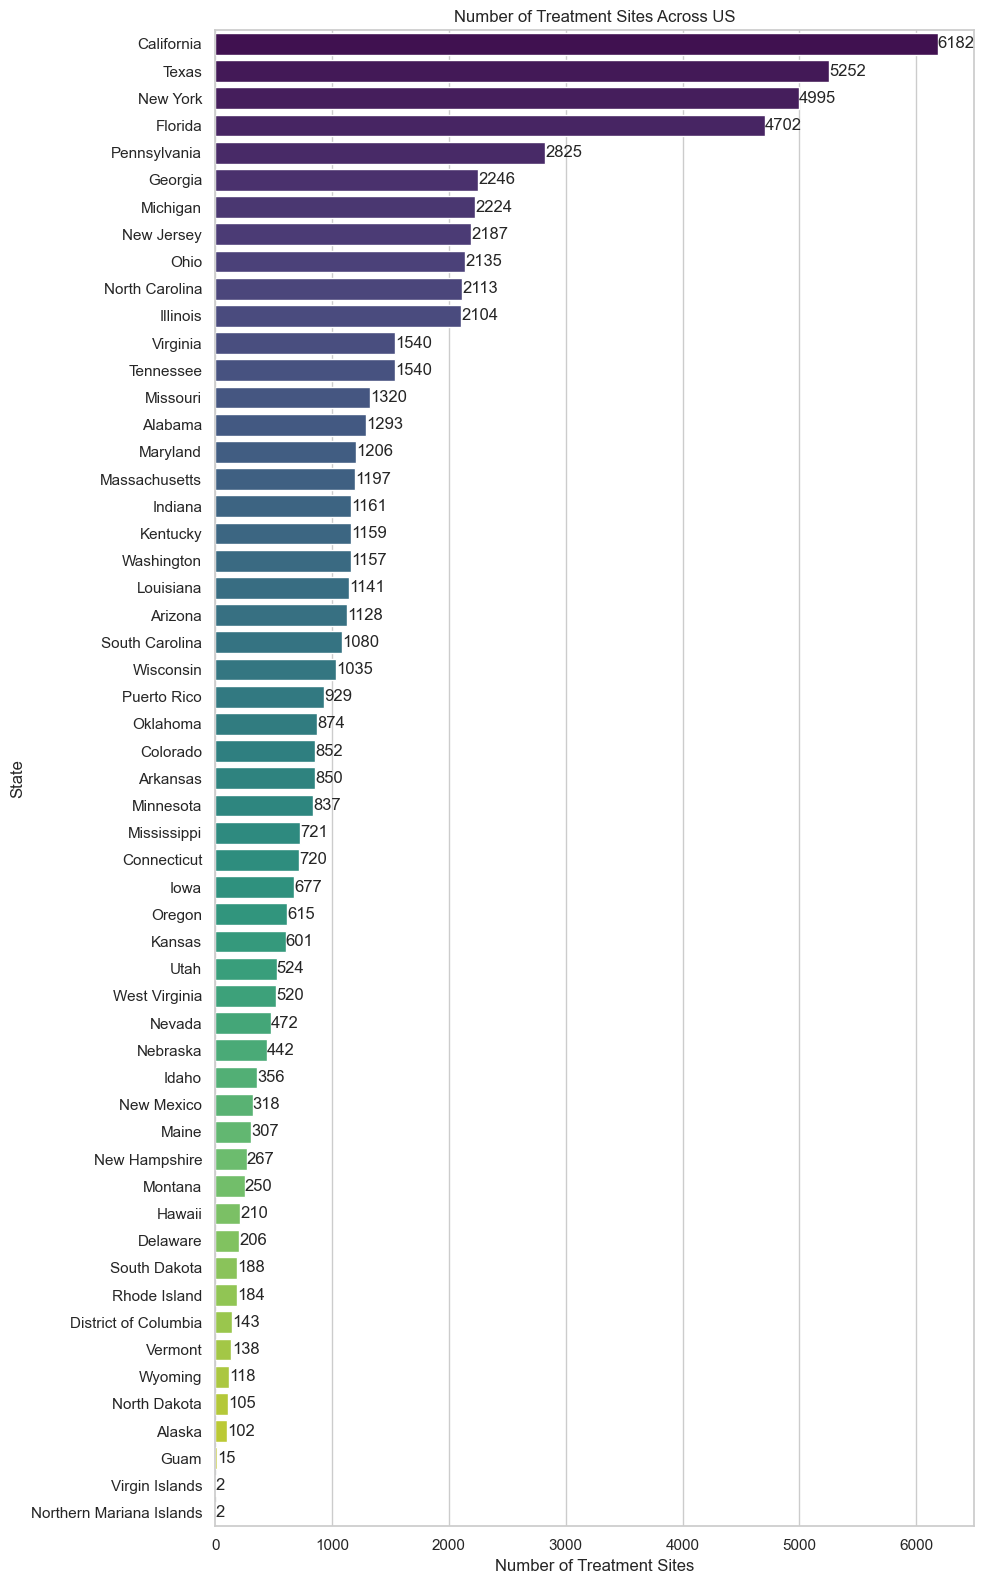

In [43]:
state_data = state_count.reset_index()
state_data.columns = ['State', 'Number of Treatment Sites']

plt.figure(figsize=(10,16))
sns.set(style="whitegrid")
bar = sns.barplot(data= state_data, x='Number of Treatment Sites', y='State', palette="viridis")

for patch in bar.patches:
    width = patch.get_width()
    y= patch.get_y() + patch.get_height() / 2
    plt.text(width + 2, y, f'{int(width)}', ha='left', va='center')
    
plt.title("Number of Treatment Sites Across US")
plt.xlabel("Number of Treatment Sites")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("number_of_treatment_sites", bbox_inches='tight')
plt.show()

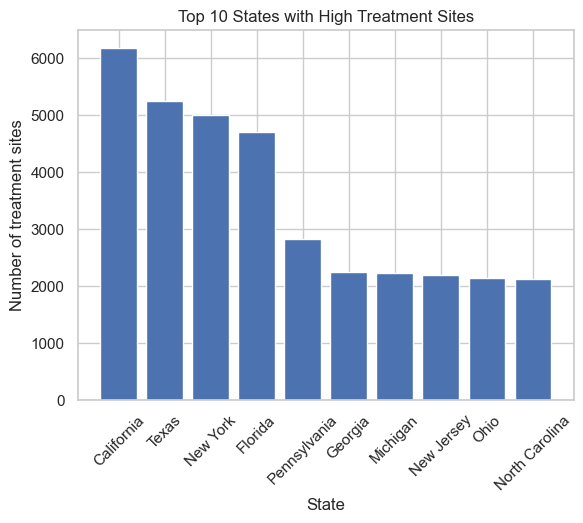

In [44]:
#Top 10 high site concentrations
top_10 = state_count.head(10)
plt.bar(top_10.index, top_10.values, label=top_10.index)
plt.title("Top 10 States with High Treatment Sites")
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Number of treatment sites')
plt.savefig("top_10_treatment_sites.png", bbox_inches='tight')
plt.show()

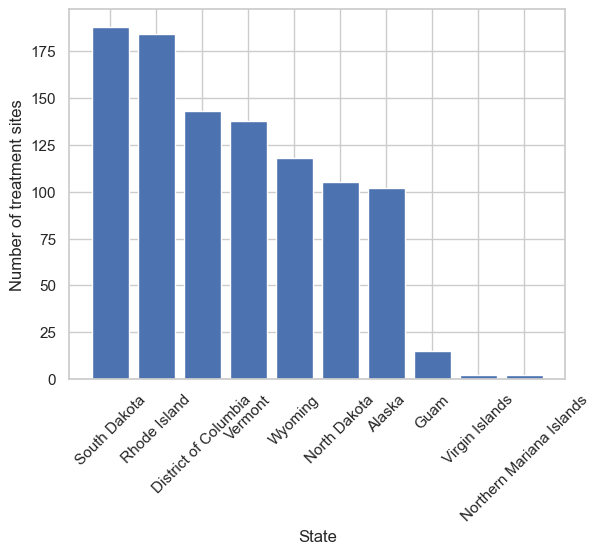

In [45]:
#Top 10 low site concentrations
bottom_10 = state_count.tail(10)
plt.bar(bottom_10.index, bottom_10.values, label=bottom_10.index)
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Number of treatment sites')
plt.show()

In [46]:
df.columns[17:]

Index(['Has Commercial Product', 'Has Paxlovid', 'Has Commercial Paxlovid',
       'Has USG Paxlovid', 'Has Lagevrio', 'Has Commercial Lagevrio',
       'Has USG Lagevrio', 'Has Veklury', 'Has Oseltamivir Generic',
       'Has Oseltamivir Suspension', 'Has Oseltamivir Tamiflu',
       'Has Baloxavir', 'Has Zanamivir', 'Has Peramivir', 'Grantee Code',
       'Is Flu', 'Is COVID-19', 'flu_covid_status'],
      dtype='object')

In [47]:
#Regions offering covid 19 treatment
#Underserved regions

covid_sites = df[
    (df['Has Paxlovid'] == True) |
    (df['Has Lagevrio'] == True) |
    (df['Has Veklury'] == True) | 
    (df['Has Oseltamivir Generic'] == True) | 
    (df['Has Oseltamivir Suspension'] == True) |
    (df['Has Baloxavir'] == True) |
    (df['Has Zanamivir'] == True) |
    (df['Has Peramivir'] == True)
]
    

treatment_site_count = covid_sites.groupby('State').size().reset_index(name='treatment_site_count')

treatment_site_count_sorted = treatment_site_count.sort_values(by='treatment_site_count', ascending=True)

underserved_regions = treatment_site_count_sorted[treatment_site_count_sorted['treatment_site_count'] <= 5]
underserved_regions

,State,treatment_site_count
47,Virgin Islands,1


In [48]:
virgin_islands_treatment = df[df['State'] == 'Virgin Islands']
for col in virgin_islands_treatment.columns:
    if 'True' in virgin_islands_treatment[col].astype(str).values:
        print({col})

{'Is PAP Site'}
{'Has USG Product'}
{'Has Commercial Product'}
{'Has Paxlovid'}
{'Has Commercial Paxlovid'}
{'Has Lagevrio'}
{'Has USG Lagevrio'}
{'Is COVID-19'}


Virgin Islands received least amount of treatment with 1 treatment site. They provided with Paxlovid, Lagevrio covid-19 medication.


In [49]:
paxlovid_sites = df[df['Has Paxlovid'] == True]

# Create a map centered around a central location (e.g., USA or world center)
mymap = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a MarkerCluster to group nearby points
marker_cluster = MarkerCluster().add_to(mymap)

# Loop through the filtered data and add markers for Paxlovid
for _, row in paxlovid_sites.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # You can adjust the radius size based on the quantity
        color="blue",  # Blue for Paxlovid
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"Site: {row['Geopoint']}<br>Last Report: {row['Last Report Date']}",
    ).add_to(marker_cluster)

# Save the map to an HTML file
mymap.save("paxlovid_sites_map.html")


In [50]:
paxlovid_sites = df[df['Has Paxlovid'] == True]
paxlovid_by_state = paxlovid_sites.groupby('State').size().reset_index(name='Paxlovid Site Count')
paxlovid_by_state = paxlovid_by_state.sort_values(by='Paxlovid Site Count', ascending=False)
print(paxlovid_by_state)

                   State  Paxlovid Site Count
4             California                 1905
44                 Texas                 1369
9                Florida                 1355
32              New York                 1133
38          Pennsylvania                  980
30            New Jersey                  609
21         Massachusetts                  601
33        North Carolina                  596
48              Virginia                  576
13              Illinois                  545
35                  Ohio                  500
10               Georgia                  492
14               Indiana                  412
20              Maryland                  405
22              Michigan                  382
2                Arizona                  374
25              Missouri                  339
43             Tennessee                  312
6            Connecticut                  311
49            Washington                  299
41        South Carolina          

In [51]:
def medication_name(df, col, medication):
    df[col] = df[col].replace({True : medication, False : ''})
    return df

In [52]:
df_medications_usg.loc[:, 'medication'] = df_medications_usg[list(columns_with_names_usg.keys())].apply(lambda x: ', '.join(filter(None, x)), axis=1)

state_medication_usg = df_medications_usg.groupby('State')['medication'].apply(lambda x: ', '.join(sorted(set(', '.join(x).split(', '))))).reset_index()

state_medication_usg['medication'] = state_medication_usg['medication'].str.lstrip(', ')

df_state_medication_usg = pd.DataFrame(state_medication_usg)
df_state_medication_usg



NameError: name 'df_medications_usg' is not defined

In [93]:
df_medications = df[['State', 'Has Paxlovid', 'Has USG Paxlovid', 'Has Lagevrio', 
                  'Has USG Lagevrio', 'Has Veklury', 'Has Oseltamivir Generic',
                  'Has Oseltamivir Suspension', 'Has Oseltamivir Tamiflu',
                  'Has Baloxavir', 'Has Zanamivir', 'Has Peramivir']]
df_medications

,State,Has Paxlovid,Has USG Paxlovid,Has Lagevrio,Has USG Lagevrio,Has Veklury,Has Oseltamivir Generic,Has Oseltamivir Suspension,Has Oseltamivir Tamiflu,Has Baloxavir,Has Zanamivir,Has Peramivir
0,Florida,False,False,False,False,False,False,False,False,False,False,False
1,Florida,False,False,False,False,False,False,False,False,False,False,False
2,Florida,True,False,False,False,False,False,False,False,False,False,False
3,Florida,True,False,False,False,False,False,False,False,False,False,False
4,Florida,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65463,District of Columbia,False,False,False,False,False,False,False,False,False,False,False
65464,District of Columbia,False,False,False,False,False,False,False,False,False,False,False
65465,District of Columbia,True,False,False,False,False,True,True,False,False,False,False
65466,District of Columbia,False,False,False,False,False,False,False,False,False,False,False


In [94]:
df_medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65468 entries, 0 to 65467
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State                       65467 non-null  object
 1   Has Paxlovid                65468 non-null  bool  
 2   Has USG Paxlovid            65468 non-null  bool  
 3   Has Lagevrio                65468 non-null  bool  
 4   Has USG Lagevrio            65468 non-null  bool  
 5   Has Veklury                 65468 non-null  bool  
 6   Has Oseltamivir Generic     65468 non-null  bool  
 7   Has Oseltamivir Suspension  65468 non-null  bool  
 8   Has Oseltamivir Tamiflu     65468 non-null  bool  
 9   Has Baloxavir               65468 non-null  bool  
 10  Has Zanamivir               65468 non-null  bool  
 11  Has Peramivir               65468 non-null  bool  
dtypes: bool(11), object(1)
memory usage: 1.2+ MB


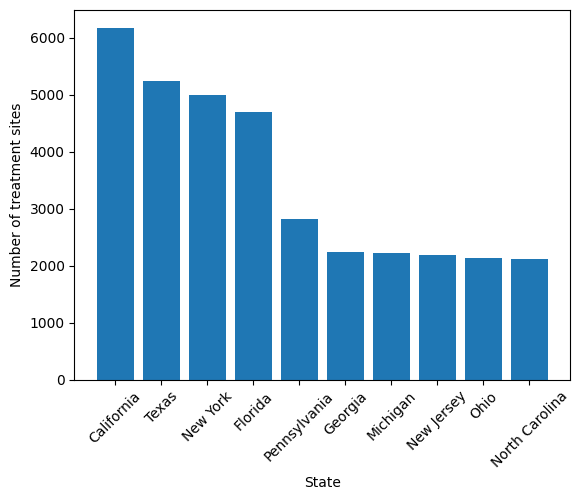

In [100]:
#Underserved Area (Regions with fewer treatment sites)
top_10 = state_count.head(10)
plt.bar(top_10.index, top_10.values, label=top_10.index)
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Number of treatment sites')
plt.show()

In [101]:
df.State.nunique()

55

In [102]:
medications = ['Has Commercial Paxlovid', 'Has USG Paxlovid', 'Has Commercial Lagevrio', 
               'Has USG Lagevrio', 'Has Veklury', 'Has Commercial Veklury']

# Group by state or region (for example, 'state_code')
grouped = df.groupby('state_code')[medications].sum()

# Calculate the difference in availability between commercial and USG versions
# This will give us the count of commercial vs USG in each state
grouped['Commercial_Paxlovid_vs_USG'] = grouped['Has Commercial Paxlovid'] - grouped['Has USG Paxlovid']
grouped['Commercial_Lagevrio_vs_USG'] = grouped['Has Commercial Lagevrio'] - grouped['Has USG Lagevrio']
grouped['Commercial_Veklury_vs_USG'] = grouped['Has Commercial Veklury'] - grouped['Has Veklury']

# Display the comparison data for commercial vs USG versions
print(grouped[['Commercial_Paxlovid_vs_USG', 'Commercial_Lagevrio_vs_USG', 'Commercial_Veklury_vs_USG']])

# Visualize the results using a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot commercial vs USG counts for each medication
grouped[['Has Commercial Paxlovid', 'Has USG Paxlovid']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Comparison of Commercial vs USG Versions of Paxlovid')
ax.set_ylabel('Number of Locations')
plt.xticks(rotation=45)
plt.show()

# Repeat for other medications (Lagevrio, Veklury)


KeyError: 'state_code'

In [20]:
# Count the number of treatment locations by state
state_counts = gdf['State'].value_counts()

shapefile_path = "C:/Users/PC/Desktop/Bala/Virtual_internship/Clinical data analysis/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the US states shapefile (this can be downloaded from various sources or use a built-in dataset)
world = gpd.read_file(shapefile_path)

# Filter for the United States
us = world[world['NAME'] == 'United States of America']

# Merge the state count data with the US shapefile
us = us.set_index('NAME').join(state_counts)

#Plot the choropleth map
ax = us.plot(column='count', legend=True, figsize=(10, 8), cmap='coolwarm', legend_kwds={'label': "Treatment Locations by State"})
ax.set_title("Number of Treatment Locations by State")


NameError: name 'gdf' is not defined

In [37]:
for col in world.columns:
    if 'Florida' in world[col].astype(str).values:
        print(f"'United States of America' is presentin column: {col}")

In [34]:
for col in us.columns:
    if 'Florida' in us[col].astype(str).values:
        print(f"'United States of America' is presentin column: {col}")

print(us.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADM0_A3',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry', 'count'],
      dtype='object', length=169)


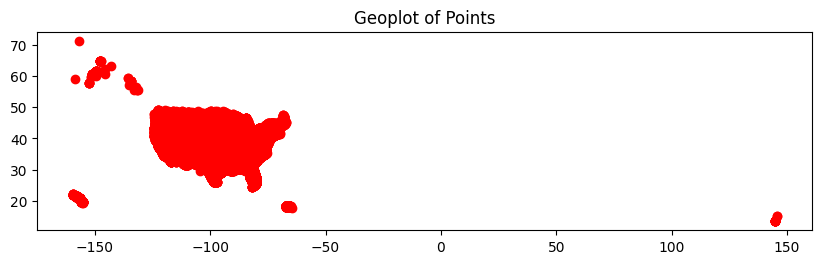

In [44]:
import geopandas as gpd
from shapely.geometry import Point

geography = df[['Longitude', 'Latitude', 'Zip']]
#Create a GeoDataFrame using Latitude and Longitude
geometry = [Point(lon, lat) for lon, lat in zip(geography['Longitude'], geography['Latitude'])]
gdf = gpd.GeoDataFrame(geography, geometry=geometry)

# Ensure the GeoDataFrame has the correct CRS (Coordinate Reference System)
gdf.set_crs("EPSG:4326", inplace=True)

# Plot the points
ax = gdf.plot(marker='o', color='red', figsize=(10, 8))
ax.set_title("Geoplot of Points")
plt.show()


In [29]:
df.is_covid.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: is_covid
Non-Null Count  Dtype
--------------  -----
1000 non-null   bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [30]:
true_count = df['is_flu'].sum()
print(true_count)

229


In [25]:
conn = sqlite3.connect(":memory:")
df.to_sql("clinical_data", conn, index=False, if_exists="replace")

1000

In [26]:
query =  """
select is_flu, is_covid from clinical_data


SyntaxError: incomplete input (1996203678.py, line 1)